In [107]:
import pandas as pd
import json

import functions

import plotly.express as px
import plotly.graph_objects as go

In [108]:
pd.reset_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Data

In [111]:
customer_info = pd.read_csv("C:/Users/aprataso/Downloads/final_data/treated/customer_info.csv")

'''basket = pd.read_csv('C:/Users/aprataso/Downloads/final_data/treated/basket_treated.csv') # basket
campaign = pd.read_csv('C:/Users/aprataso/Downloads/final_data/treated/campaigns_treated.csv') # campaign
coupon = pd.read_csv('C:/Users/aprataso/Downloads/final_data/treated/coupon_treated.csv') # basket
prod = pd.read_csv('C:/Users/aprataso/Downloads/final_data/treated/prod_treated.csv') # prod
causal = pd.read_csv('C:/Users/aprataso/Downloads/final_data/treated/causal_treated.csv')# prod'''

"basket = pd.read_csv('C:/Users/aprataso/Downloads/final_data/treated/basket_treated.csv') # basket\ncampaign = pd.read_csv('C:/Users/aprataso/Downloads/final_data/treated/campaigns_treated.csv') # campaign\ncoupon = pd.read_csv('C:/Users/aprataso/Downloads/final_data/treated/coupon_treated.csv') # basket\nprod = pd.read_csv('C:/Users/aprataso/Downloads/final_data/treated/prod_treated.csv') # prod\ncausal = pd.read_csv('C:/Users/aprataso/Downloads/final_data/treated/causal_treated.csv')# prod"

In [113]:
def deserialize_list(json_str):
    return json.loads(json_str)

# Apply deserialization
customer_info['quantity2'] = customer_info['quantity_serialized'].apply(deserialize_list)


In [114]:
def find_non_numeric_values(lst):
    non_numeric_values = [item for item in lst if not isinstance(item, (int, float))]
    return non_numeric_values

customer_info['quantity2'].apply(find_non_numeric_values)

0      []
1      []
2      []
3      []
4      []
       ..
796    []
797    []
798    []
799    []
800    []
Name: quantity2, Length: 801, dtype: object

In [80]:
customer_info = customer_info.drop(['Unnamed: 0'], axis = 1)

In [81]:
# Convert JSON strings back to dictionaries
customer_info['dep_quantity'] = customer_info['dep_quantity'].apply(lambda x: json.loads(x))

In [112]:
customer_info.head(3)

,Unnamed: 0,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,household_key,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,male,female,quantity,sales_value_eu,department,department_,sales_value_eu_,quantity_,quantit_y,Groceries_spend,DELI_spend,Meat_spend,Bakery_spend,DRUG GM_spend,SALAD BAR_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,COSMETICS_spend,MISC. TRANS._spend,Seafood_spend,KIOSK-GAS_spend,SPIRITS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,DAIRY DELI_spend,AUTOMOTIVE_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,TRAVEL & LEISUR_spend,GM MERCH EXP_spend,POSTAL CENTER_spend,DELI/SNACK BAR_spend,VIDEO_spend,RX_spend,PROD-WHS SALES_spend,PHOTO_spend,PHARMACY SUPPLY_spend,TOYS_spend,HOUSEWARES_spend,HBC_spend,VIDEO RENTAL_spend,dep_quantity,quantity_serialized
0,0,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,married,senior,2.000000,NaN,65.000000,42000,1,1,"[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, ...","[4.27, 3.2, 1.17, 3.97, 2.99, 7.69, 2.68, 1.59...","['Groceries', 'Groceries', 'Groceries', 'DELI'...","['Groceries', 'Groceries', 'Groceries', 'DELI'...","[4.27, 3.2, 1.17, 3.97, 2.99, 7.69, 2.68, 1.59...","[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, ...",4158.560000,226.990000,418.070000,127.380000,712.800000,67.590000,21.400000,4.470000,8.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"{""ELECT &PLUMBING"": 0, ""COUP/STR & MFG"": 0, ""M...","[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, ..."
1,1,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7,married,middle-aged,2.000000,NaN,49.500000,62000,1,1,"[2, 1, 3, 4, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, ...","[3.62, 1.17, 2.82, 4.28, 4.18, 4.13, 1.46, 2.4...","['Groceries', 'Groceries', 'Groceries', 'Groce...","['Groceries', 'Groceries', 'Groceries', 'Groce...","[3.62, 1.17, 2.82, 4.28, 4.18, 4.13, 1.46, 2.4...","[2, 1, 3, 4, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, ...","[2.0, 1.0, 3.0, 4.0, 1.0, 1.0, 2.0, 1.0, 1.0, ...",2957.050000,171.570000,314.790000,27.620000,845.930000,0.000000,0.000000,0.000000,5.340000,101.340000,1.870000,7.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"{""ELECT &PLUMBING"": 0, ""COUP/STR & MFG"": 0, ""M...","[2, 1, 3, 4, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, ..."
2,2,U,25-34K,Unknown,2 Adults Kids,3,1,8,unknown,adult,2.000000,True,29.500000,29500,1,1,"[1, 1, 1, 2, 3, 2, 1, 1, 1, 4, 1, 4, 1, 1, 2, ...","[3.73, 0.21, 4.27, 0.43, 12.17, 4.26, 0.94, 1....","['Groceries', 'Groceries', 'DRUG GM', 'Groceri...","['Groceries', 'Groceries', 'DRUG GM', 'Groceri...","[3.73, 0.21, 4.27, 0.43, 12.17, 4.26, 0.94, 1....","[1, 1, 1, 2, 3, 2, 1, 1, 1, 4, 1, 4, 1, 1, 2, ...","[1.0, 1.0, 1.0, 2.0, 3.0, 2.0, 1.0, 1.0, 1.0, ...",4784.660000,152.360000,1043.120000,112.600000,1182.170000,77.710000,3.380000,0.000000,225.630000,36.140000,0.000000,42.800000,1723743.250000,53.450000,5.360000,57.080000,2.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"{""ELECT &PLUMBING"": 0, ""COUP/STR & MFG"": 0, ""M...","[1, 1, 1, 2, 3, 2, 1, 1, 1, 4, 1, 4, 1, 1, 2, ..."


In [83]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.6f}'.format)

customer_info.describe().T

,count,mean,std,min,25%,50%,75%,max
household_key,801.000000,1235.176030,736.804647,1.000000,596.000000,1218.000000,1914.000000,2499.000000
adult_category_size,728.000000,1.607143,0.488721,1.000000,1.000000,2.000000,2.000000,2.000000
avg_age,801.000000,44.054307,11.816719,21.500000,39.500000,49.500000,49.500000,65.000000
avg_income,801.000000,64810.237203,46952.864077,15000.000000,29500.000000,62000.000000,87000.000000,250000.000000
male,801.000000,0.684145,0.465146,0.000000,0.000000,1.000000,1.000000,1.000000
female,801.000000,0.776529,0.416831,0.000000,1.000000,1.000000,1.000000,1.000000
Groceries_spend,801.000000,5477.949600,4450.524485,371.490000,2717.270000,4396.250000,6927.230000,62656.850000
DELI_spend,801.000000,226.075543,274.086843,0.000000,56.000000,134.950000,292.680000,2696.360000
Meat_spend,801.000000,1042.887553,967.181314,0.000000,406.420000,758.290000,1338.850000,9091.490000
Bakery_spend,801.000000,116.830724,135.796516,0.000000,31.890000,79.700000,149.630000,1343.350000


In [84]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   marital_status_code    801 non-null    object 
 1   income_desc            801 non-null    object 
 2   homeowner_desc         801 non-null    object 
 3   hh_comp_desc           801 non-null    object 
 4   household_size_desc    801 non-null    object 
 5   kid_category_desc      801 non-null    object 
 6   household_key          801 non-null    int64  
 7   marital_status         801 non-null    object 
 8   age_group              801 non-null    object 
 9   adult_category_size    728 non-null    float64
 10  has_kids               426 non-null    object 
 11  avg_age                801 non-null    float64
 12  avg_income             801 non-null    int64  
 13  male                   801 non-null    int64  
 14  female                 801 non-null    int64  
 15  quanti

## Incoherencies

In [85]:
pd.reset_option('display.max_rows', None)
pd.reset_option('display.max_colwidth', None)

In [86]:
customer_info[customer_info['KIOSK-GAS_spend'] > 100000]

,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,household_key,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,male,female,quantity,sales_value_eu,department,department_,sales_value_eu_,quantity_,quantit_y,Groceries_spend,DELI_spend,Meat_spend,Bakery_spend,DRUG GM_spend,SALAD BAR_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,COSMETICS_spend,MISC. TRANS._spend,Seafood_spend,KIOSK-GAS_spend,SPIRITS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,DAIRY DELI_spend,AUTOMOTIVE_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,TRAVEL & LEISUR_spend,GM MERCH EXP_spend,POSTAL CENTER_spend,DELI/SNACK BAR_spend,VIDEO_spend,RX_spend,PROD-WHS SALES_spend,PHOTO_spend,PHARMACY SUPPLY_spend,TOYS_spend,HOUSEWARES_spend,HBC_spend,VIDEO RENTAL_spend,dep_quantity
2,U,25-34K,Unknown,2 Adults Kids,3,1,8,unknown,adult,2.000000,True,29.500000,29500,1,1,"[1, 1, 1, 2, 3, 2, 1, 1, 1, 4, 1, 4, 1, 1, 2, ...","[3.73, 0.21, 4.27, 0.43, 12.17, 4.26, 0.94, 1....","['Groceries', 'Groceries', 'DRUG GM', 'Groceri...","['Groceries', 'Groceries', 'DRUG GM', 'Groceri...","[3.73, 0.21, 4.27, 0.43, 12.17, 4.26, 0.94, 1....","[1, 1, 1, 2, 3, 2, 1, 1, 1, 4, 1, 4, 1, 1, 2, ...","[1.0, 1.0, 1.0, 2.0, 3.0, 2.0, 1.0, 1.0, 1.0, ...",4784.660000,152.360000,1043.120000,112.600000,1182.170000,77.710000,3.380000,0.000000,225.630000,36.140000,0.000000,42.800000,1723743.250000,53.450000,5.360000,57.080000,2.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"{'ELECT &PLUMBING': 0, 'COUP/STR & MFG': 0, 'M..."
3,U,75-99K,Homeowner,2 Adults Kids,4,2,13,unknown,adult,2.000000,True,29.500000,87000,1,1,"[1, 1, 5, 1, 1, 2, 1, 3, 1, 2, 5, 6, 2, 2, 1, ...","[13.63, 2.99, 13.38, 16.04, 1.17, 5.01, 0.92, ...","['DRUG GM', 'Groceries', 'Groceries', 'DRUG GM...","['DRUG GM', 'Groceries', 'Groceries', 'DRUG GM...","[13.63, 2.99, 13.38, 16.04, 1.17, 5.01, 0.92, ...","[1, 1, 5, 1, 1, 2, 1, 3, 1, 2, 5, 6, 2, 2, 1, ...","[1.0, 1.0, 5.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, ...",9659.640000,104.850000,554.040000,15.520000,4782.130000,10.800000,30899529.930000,0.000000,50.240000,51.380000,0.000000,25.530000,63359349.720000,0.000000,0.000000,0.000000,0.000000,7.690000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"{'ELECT &PLUMBING': 0, 'COUP/STR & MFG': 0, 'M..."
4,B,50-74K,Homeowner,Single Female,1,None/Unknown,16,single,middle-aged,1.000000,False,49.500000,62000,0,1,"[1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, ...","[1.81, 3.09, 3.73, 2.56, 2.12, 0.85, 6.4, 5.33...","['Groceries', 'Groceries', 'Meat', 'Groceries'...","['Groceries', 'Groceries', 'Meat', 'Groceries'...","[1.81, 3.09, 3.73, 2.56, 2.12, 0.85, 6.4, 5.33...","[1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, ...",1128.980000,104.740000,183.070000,88.250000,94.350000,6.880000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2083362.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"{'ELECT &PLUMBING': 0, 'COUP/STR & MFG': 0, 'M..."
5,B,Under 15K,Homeowner,2 Adults No Kids,2,None/Unknown,17,single,senior,2.000000,NaN,65.000000,15000,1,1,"[2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 2, ...","[10.68, 0.94, 4.27, 1.26, 4.27, 3.19, 1.06, 5....","['Meat', 'Groceries', 'DRUG GM', 'Groceries', ...","['Meat', 'Groceries', 'DRUG GM', 'Groceries', ...","[10.68, 0.94, 4.27, 1.26, 4.27, 3.19, 1.06, 5....","[2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 2, ...","[2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, ...",6463.320000,39.980000,4460.130000,67.950000,2201.700000,0.000000,0.000000,0.000000,0.000000,0.000000,5.340000,131.780000,7728667.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110000,0.000000,0.

In [87]:
customer_info['dep_quantity'].apply(lambda x: x.get('KIOSK-GAS', 0))



0            0
1            0
2        65914
3      1399474
4        80628
        ...   
796      57070
797     128411
798      58262
799          0
800      71137
Name: dep_quantity, Length: 801, dtype: int64

In [88]:
# Check the types of values in the column
print(customer_info['dep_quantity'].apply(type).value_counts())


dep_quantity
<class 'dict'>    801
Name: count, dtype: int64


In [89]:
customer_info[customer_info['MISC SALES TRAN_spend'] > 100000]

,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,household_key,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,male,female,quantity,sales_value_eu,department,department_,sales_value_eu_,quantity_,quantit_y,Groceries_spend,DELI_spend,Meat_spend,Bakery_spend,DRUG GM_spend,SALAD BAR_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,COSMETICS_spend,MISC. TRANS._spend,Seafood_spend,KIOSK-GAS_spend,SPIRITS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,DAIRY DELI_spend,AUTOMOTIVE_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,TRAVEL & LEISUR_spend,GM MERCH EXP_spend,POSTAL CENTER_spend,DELI/SNACK BAR_spend,VIDEO_spend,RX_spend,PROD-WHS SALES_spend,PHOTO_spend,PHARMACY SUPPLY_spend,TOYS_spend,HOUSEWARES_spend,HBC_spend,VIDEO RENTAL_spend,dep_quantity
3,U,75-99K,Homeowner,2 Adults Kids,4,2,13,unknown,adult,2.000000,True,29.500000,87000,1,1,"[1, 1, 5, 1, 1, 2, 1, 3, 1, 2, 5, 6, 2, 2, 1, ...","[13.63, 2.99, 13.38, 16.04, 1.17, 5.01, 0.92, ...","['DRUG GM', 'Groceries', 'Groceries', 'DRUG GM...","['DRUG GM', 'Groceries', 'Groceries', 'DRUG GM...","[13.63, 2.99, 13.38, 16.04, 1.17, 5.01, 0.92, ...","[1, 1, 5, 1, 1, 2, 1, 3, 1, 2, 5, 6, 2, 2, 1, ...","[1.0, 1.0, 5.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, ...",9659.640000,104.850000,554.040000,15.520000,4782.130000,10.800000,30899529.930000,0.000000,50.240000,51.380000,0.000000,25.530000,63359349.720000,0.000000,0.000000,0.000000,0.000000,7.690000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"{'ELECT &PLUMBING': 0, 'COUP/STR & MFG': 0, 'M..."
6,A,100-124K,Homeowner,2 Adults No Kids,2,None/Unknown,18,married,middle-aged,2.000000,NaN,49.500000,112000,1,1,"[1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, ...","[2.68, 1.86, 5.76, 1.79, 4.27, 5.39, 2.56, 2.9...","['Groceries', 'Groceries', 'Groceries', 'Groce...","['Groceries', 'Groceries', 'Groceries', 'Groce...","[2.68, 1.86, 5.76, 1.79, 4.27, 5.39, 2.56, 2.9...","[1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 1, 1, ...","[1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, ...",7619.710000,330.760000,635.970000,16.530000,531.170000,0.000000,8024246.420000,0.000000,0.000000,0.000000,2.680000,534.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"{'ELECT &PLUMBING': 0, 'COUP/STR & MFG': 1, 'M..."
12,B,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,31,single,middle-aged,2.000000,NaN,39.500000,42000,1,1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...","[9.94, 6.41, 1.82, 2.66, 2.45, 1.59, 3.89, 3.8...","['DRUG GM', 'DRUG GM', 'Groceries', 'Meat', 'M...","['DRUG GM', 'DRUG GM', 'Groceries', 'Meat', 'M...","[9.94, 6.41, 1.82, 2.66, 2.45, 1.59, 3.89, 3.8...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3934.870000,211.730000,495.680000,10.340000,933.420000,0.000000,1097920.590000,0.000000,8.550000,0.000000,12.800000,0.000000,13583237.860000,0.000000,2.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"{'ELECT &PLUMBING': 0, 'COUP/STR & MFG': 0, 'M..."
17,A,150-174K,Homeowner,2 Adults Kids,5+,3+,46,married,middle-aged,2.000000,True,49.500000,162000,1,1,"[1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...","[10.69, 1.88, 3.19, 1.88, 8.54, 1.61, 2.12, 2....","['DRUG GM', 'Groceries', 'Groceries', 'Groceri...","['DRUG GM', 'Groceries', 'Groceries', 'Groceri...","[10.69, 1.88, 3.19, 1.88, 8.54, 1.61, 2.12, 2....","[1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, ...",8358.160000,315.230000,1740.070000,193.300000,2612.410000,38.190000,5789167.510000,48.310000,70.520000,48.520000,2.660000,82.460000,0.000000,6.410000,2.680000,0.000000,1.170000,

## Missing Values

In [90]:
customer_info.isna().sum()

marital_status_code        0
income_desc                0
homeowner_desc             0
hh_comp_desc               0
household_size_desc        0
kid_category_desc          0
household_key              0
marital_status             0
age_group                  0
adult_category_size       73
has_kids                 375
avg_age                    0
avg_income                 0
male                       0
female                     0
quantity                   0
sales_value_eu             0
department                 0
department_                0
sales_value_eu_            0
quantity_                  0
quantit_y                  0
Groceries_spend            0
DELI_spend                 0
Meat_spend                 0
Bakery_spend               0
DRUG GM_spend              0
SALAD BAR_spend            0
MISC SALES TRAN_spend      0
RESTAURANT_spend           0
FLORAL_spend               0
COSMETICS_spend            0
MISC. TRANS._spend         0
Seafood_spend              0
KIOSK-GAS_spen

In [91]:
customer_info['has_kids'] = customer_info['has_kids'].fillna(False)

C:\Users\aprataso\AppData\Local\Temp\ipykernel_14572\708568793.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer_info['has_kids'] = customer_info['has_kids'].fillna(False)


In [92]:
#customer_info['n_kids'] = customer_info['n_kids'].fillna(0)

In [93]:
customer_info[customer_info['adult_category_size'].isnull()]#.describe().T

,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,household_key,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,male,female,quantity,sales_value_eu,department,department_,sales_value_eu_,quantity_,quantit_y,Groceries_spend,DELI_spend,Meat_spend,Bakery_spend,DRUG GM_spend,SALAD BAR_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,COSMETICS_spend,MISC. TRANS._spend,Seafood_spend,KIOSK-GAS_spend,SPIRITS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,DAIRY DELI_spend,AUTOMOTIVE_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,TRAVEL & LEISUR_spend,GM MERCH EXP_spend,POSTAL CENTER_spend,DELI/SNACK BAR_spend,VIDEO_spend,RX_spend,PROD-WHS SALES_spend,PHOTO_spend,PHARMACY SUPPLY_spend,TOYS_spend,HOUSEWARES_spend,HBC_spend,VIDEO RENTAL_spend,dep_quantity
10,U,50-74K,Unknown,Unknown,1,None/Unknown,25,unknown,middle-aged,NaN,False,39.500000,62000,0,0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, ...","[1.06, 2.13, 1.61, 1.06, 2.68, 2.14, 2.68, 2.6...","['Groceries', 'DRUG GM', 'Groceries', 'Groceri...","['Groceries', 'DRUG GM', 'Groceries', 'Groceri...","[1.06, 2.13, 1.61, 1.06, 2.68, 2.14, 2.68, 2.6...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2437.690000,80.620000,565.260000,33.320000,1356.580000,11.010000,0.000000,0.000000,0.000000,0.000000,11.080000,12.810000,1062959.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"{'ELECT &PLUMBING': 0, 'COUP/STR & MFG': 0, 'M..."
51,U,50-74K,Unknown,Unknown,1,None/Unknown,136,unknown,middle-aged,NaN,False,49.500000,62000,0,0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.28, 1.07, 1.06, 3.2, 3.15, 1.07, 3.88, 2.68...","['Groceries', 'Groceries', 'Groceries', 'Groce...","['Groceries', 'Groceries', 'Groceries', 'Groce...","[2.28, 1.07, 1.06, 3.2, 3.15, 1.07, 3.88, 2.68...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2667.430000,110.250000,589.800000,51.870000,195.480000,0.000000,23.010000,0.000000,6.400000,0.000000,41.720000,3.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"{'ELECT &PLUMBING': 0, 'COUP/STR & MFG': 0, 'M..."
56,U,50-74K,Homeowner,Unknown,1,None/Unknown,158,unknown,middle-aged,NaN,False,49.500000,62000,0,0,"[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.66, 2.68, 2.68, 33.52, 3.39, 1.38, 0.0, 1.0...","['Meat', 'Meat', 'Groceries', 'DRUG GM', 'Meat...","['Meat', 'Meat', 'Groceries', 'DRUG GM', 'Meat...","[1.66, 2.68, 2.68, 33.52, 3.39, 1.38, 0.0, 1.0...","[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...",897.040000,9.690000,295.420000,11.120000,1013.350000,0.000000,0.000000,0.000000,8.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"{'ELECT &PLUMBING': 0, 'COUP/STR & MFG': 0, 'M..."
74,U,50-74K,Homeowner,Unknown,1,None/Unknown,216,unknown,middle-aged,NaN,False,39.500000,62000,0,0,"[1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 2, 1, ...","[2.68, 4.25, 2.49, 2.11, 7.48, 1.38, 4.1, 0.86...","['Groceries', 'Groceries', 'Groceries', 'Groce...","['Groceries', 'Groceries', 'Groceries', 'Groce...","[2.68, 4.25, 2.49, 2.11, 7.48, 1.38, 4.1, 0.86...","[1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 2, 1, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, ...",2529.020000,280.990000,411.780000,110.680000,1096.510000,6.090000,9.540000,2.700000,99.480000,4.450000,0.000000,66.660000,0.000000,0.000000,0.000000,133.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [94]:
import numpy as np

def convert_household_size(value):
    if isinstance(value, str):
        if value.endswith('+'):
            return float(value.replace('+', ''))
        elif value.isdigit():
            return float(value)
        else:
            return np.nan
    return value

def convert_kid_category(value):
    if value in ['None', 'None/Unknown', np.nan]:
        return 0
    elif value.isdigit():
        return float(value)
    return np.nan

# Temporarily clean and convert columns
temp_household_size = customer_info['household_size_desc'].apply(convert_household_size)
temp_kid_category = customer_info['kid_category_desc'].apply(convert_kid_category)

# Perform the operation to fill missing values in 'adult_category_size'
customer_info.loc[customer_info['adult_category_size'].isnull(), 'adult_category_size'] = (
    temp_household_size - temp_kid_category
)

In [95]:
customer_info[customer_info['adult_category_size'].isnull()]

,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,household_key,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,male,female,quantity,sales_value_eu,department,department_,sales_value_eu_,quantity_,quantit_y,Groceries_spend,DELI_spend,Meat_spend,Bakery_spend,DRUG GM_spend,SALAD BAR_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,COSMETICS_spend,MISC. TRANS._spend,Seafood_spend,KIOSK-GAS_spend,SPIRITS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,DAIRY DELI_spend,AUTOMOTIVE_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,TRAVEL & LEISUR_spend,GM MERCH EXP_spend,POSTAL CENTER_spend,DELI/SNACK BAR_spend,VIDEO_spend,RX_spend,PROD-WHS SALES_spend,PHOTO_spend,PHARMACY SUPPLY_spend,TOYS_spend,HOUSEWARES_spend,HBC_spend,VIDEO RENTAL_spend,dep_quantity
341,A,35-49K,Unknown,Unknown,5+,3+,1012,married,middle-aged,NaN,False,39.500000,42000,0,0,"[3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 3, ...","[4.57, 2.13, 1.38, 2.68, 4.27, 13.9, 1.06, 4.2...","['Groceries', 'DRUG GM', 'Groceries', 'Meat', ...","['Groceries', 'DRUG GM', 'Groceries', 'Meat', ...","[4.57, 2.13, 1.38, 2.68, 4.27, 13.9, 1.06, 4.2...","[3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 3, ...","[3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, ...",1782.290000,74.850000,360.560000,27.980000,529.440000,107.240000,5.140000,0.000000,1.070000,20.970000,0.000000,3.200000,2701263.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"{'ELECT &PLUMBING': 0, 'COUP/STR & MFG': 0, 'M..."
579,U,125-149K,Homeowner,Unknown,5+,3+,1834,unknown,middle-aged,NaN,False,49.500000,137000,0,0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, ...","[3.73, 0.85, 4.84, 1.59, 1.86, 0.85, 4.8, 2.56...","['Groceries', 'Groceries', 'Meat', 'Groceries'...","['Groceries', 'Groceries', 'Meat', 'Groceries'...","[3.73, 0.85, 4.84, 1.59, 1.86, 0.85, 4.8, 2.56...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",3486.780000,339.260000,564.960000,106.450000,281.960000,0.000000,3.180000,0.000000,33.160000,19.440000,2.660000,17.100000,2985047.310000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.260000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"{'ELECT &PLUMBING': 0, 'COUP/STR & MFG': 2, 'M..."
628,U,50-74K,Unknown,Unknown,5+,3+,1985,unknown,adult,NaN,False,29.500000,62000,0,0,"[2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...","[7.04, 1.06, 17.1, 3.41, 1.27, 7.05, 4.26, 2.2...","['DRUG GM', 'Groceries', 'DRUG GM', 'Groceries...","['DRUG GM', 'Groceries', 'DRUG GM', 'Groceries...","[7.04, 1.06, 17.1, 3.41, 1.27, 7.05, 4.26, 2.2...","[2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, ...",7863.420000,541.910000,1634.100000,344.380000,4647.460000,84.960000,0.000000,0.000000,5.350000,10.440000,36.140000,190.170000,0.000000,0.000000,2.130000,0.000000,1.020000,0.000000,0.000000,0.000000,18.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"{'ELECT &PLUMBING': 0, 'COUP/STR & MFG': 0, 'M..."


In [96]:
customer_info['adult_category_size'] = customer_info['adult_category_size'].fillna(2)

In [97]:
customer_info[customer_info['adult_category_size'].isnull()]

,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,household_key,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,male,female,quantity,sales_value_eu,department,department_,sales_value_eu_,quantity_,quantit_y,Groceries_spend,DELI_spend,Meat_spend,Bakery_spend,DRUG GM_spend,SALAD BAR_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,COSMETICS_spend,MISC. TRANS._spend,Seafood_spend,KIOSK-GAS_spend,SPIRITS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,DAIRY DELI_spend,AUTOMOTIVE_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,TRAVEL & LEISUR_spend,GM MERCH EXP_spend,POSTAL CENTER_spend,DELI/SNACK BAR_spend,VIDEO_spend,RX_spend,PROD-WHS SALES_spend,PHOTO_spend,PHARMACY SUPPLY_spend,TOYS_spend,HOUSEWARES_spend,HBC_spend,VIDEO RENTAL_spend,dep_quantity


## Outliers

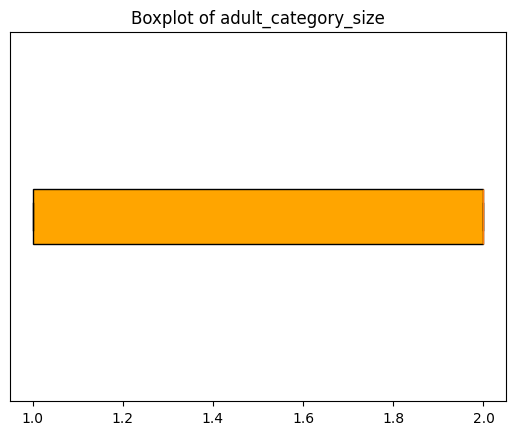

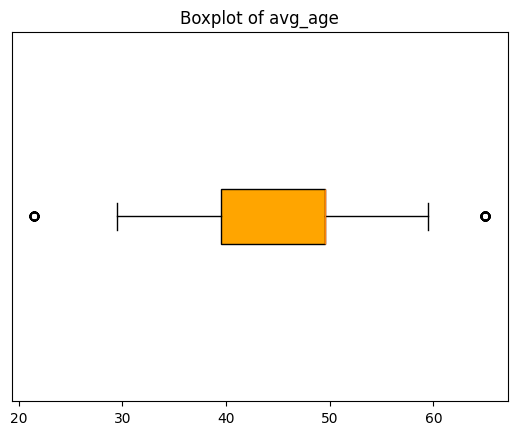

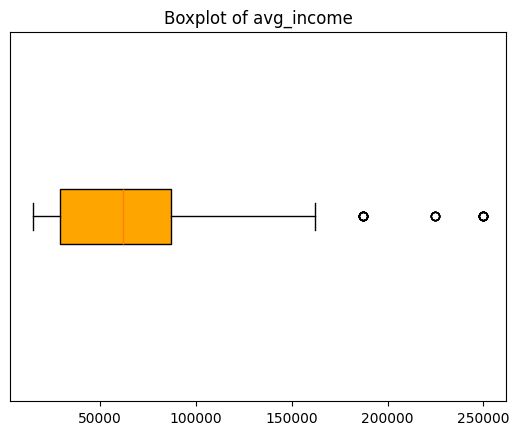

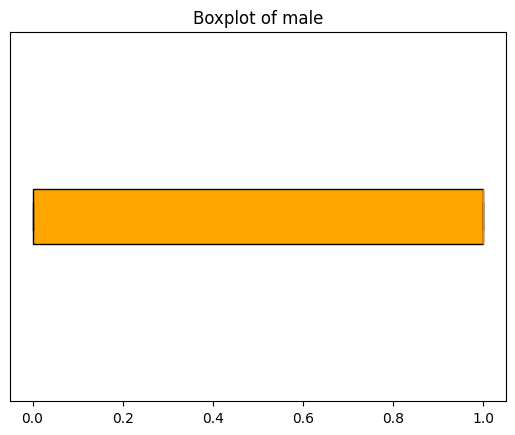

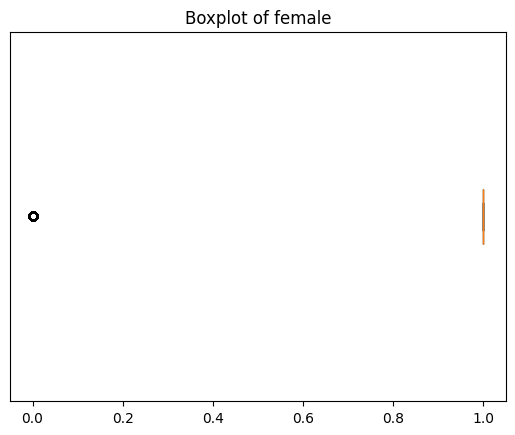

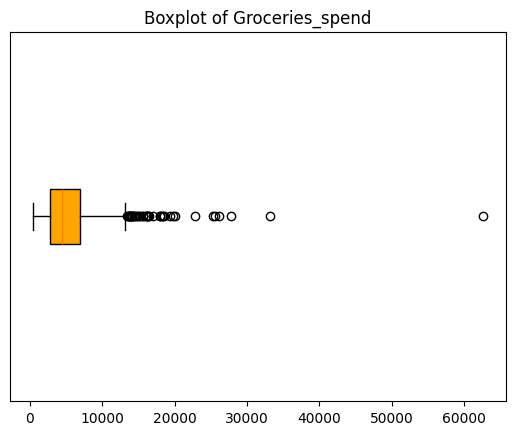

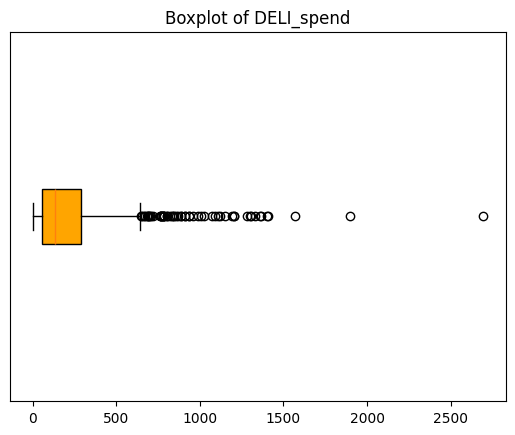

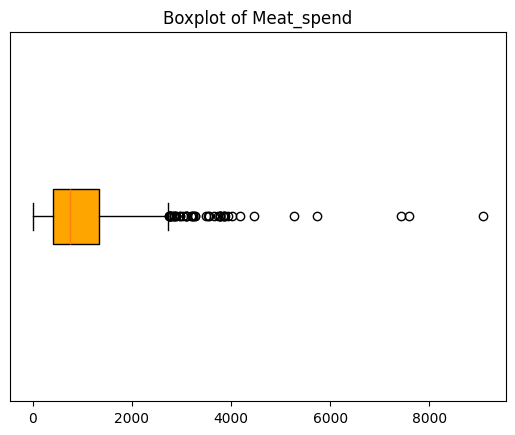

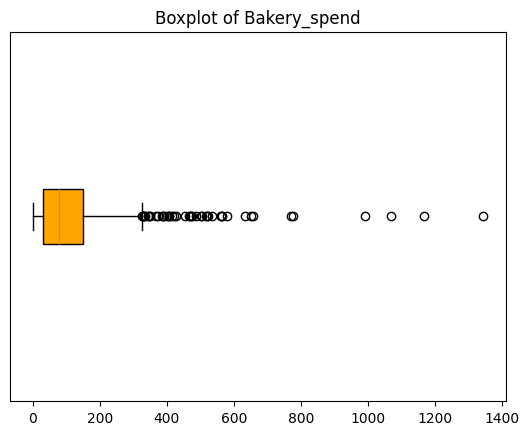

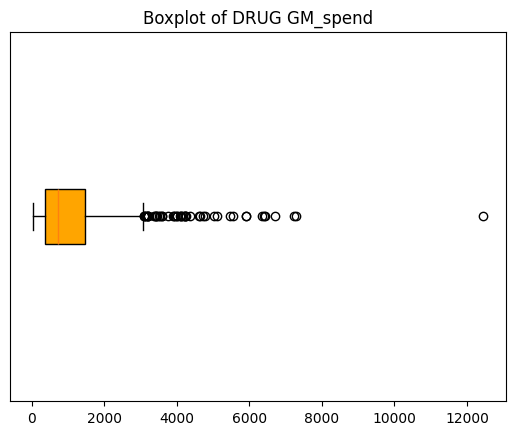

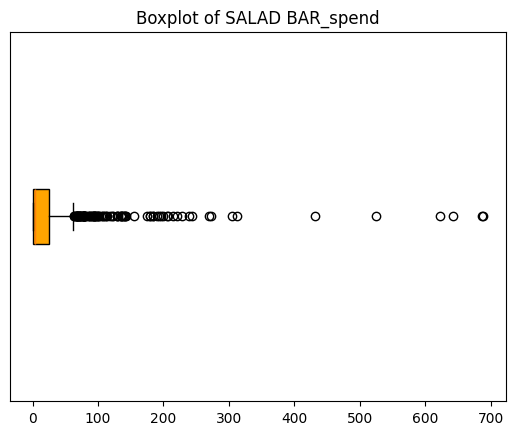

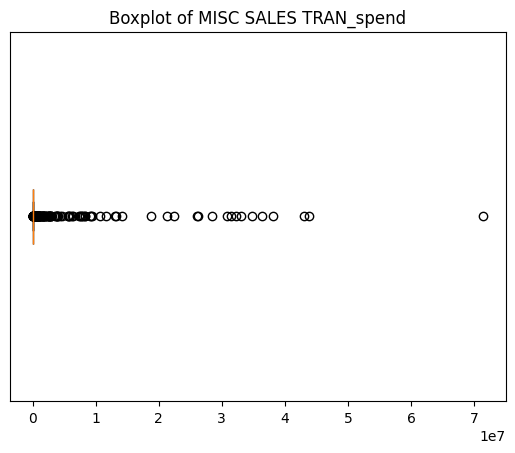

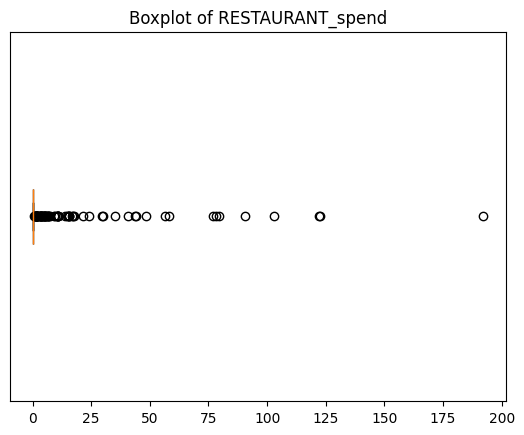

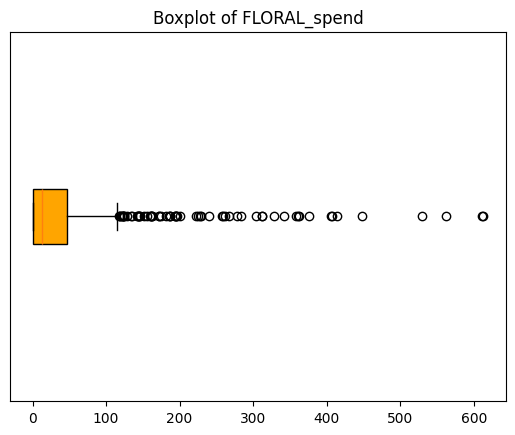

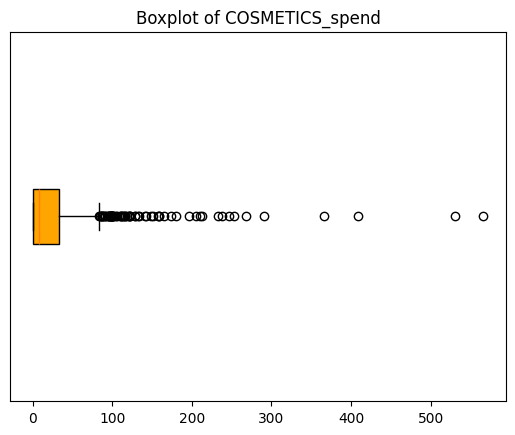

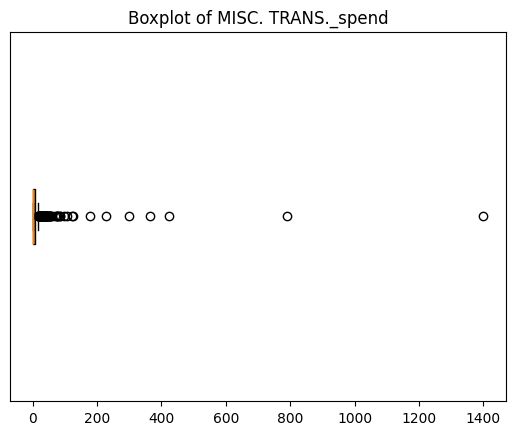

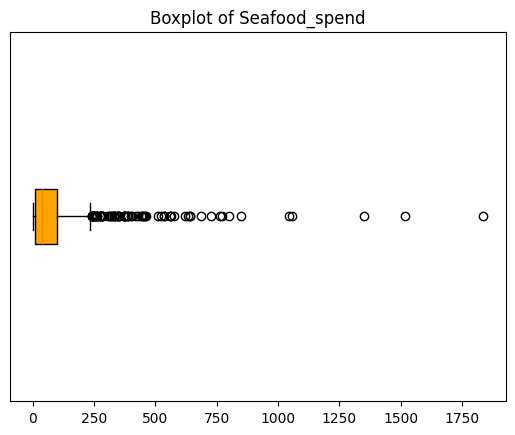

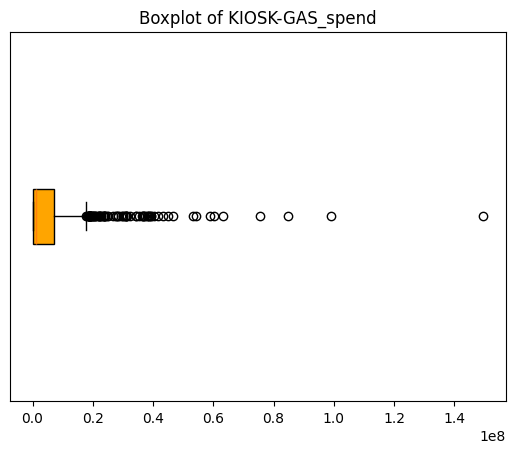

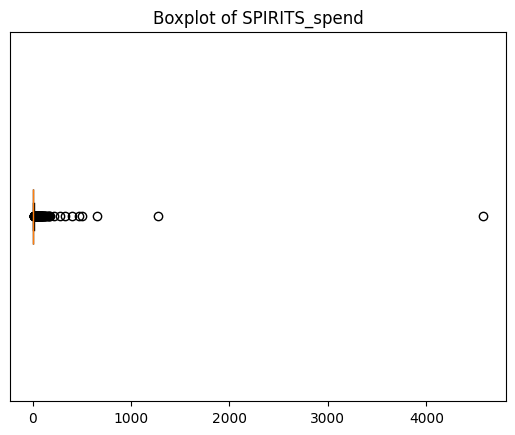

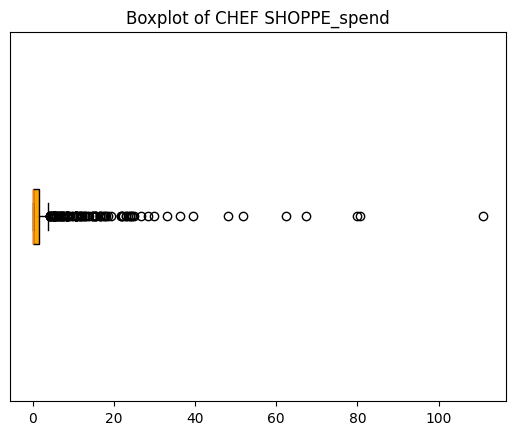

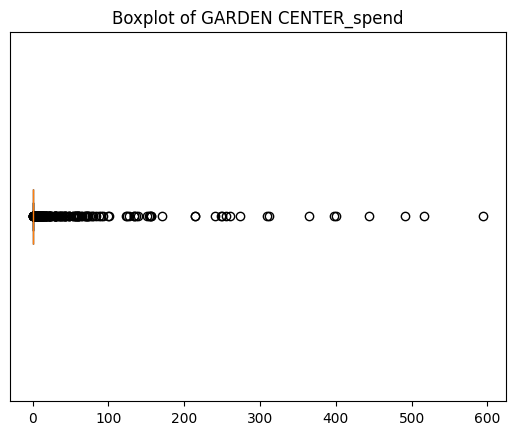

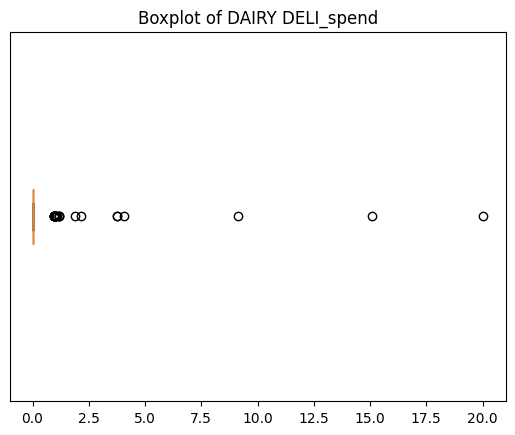

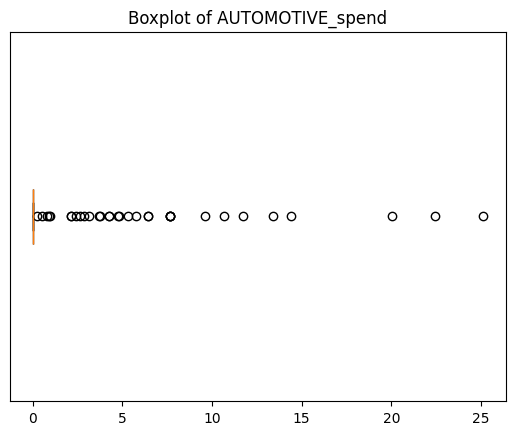

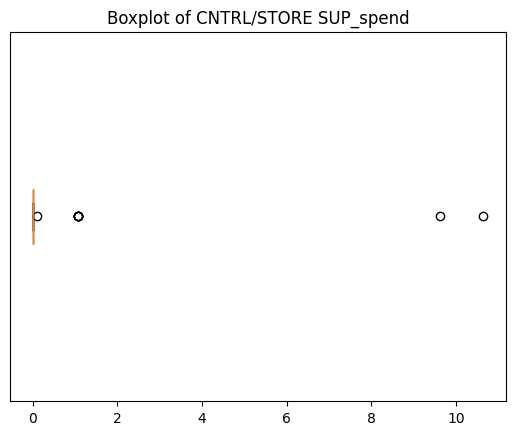

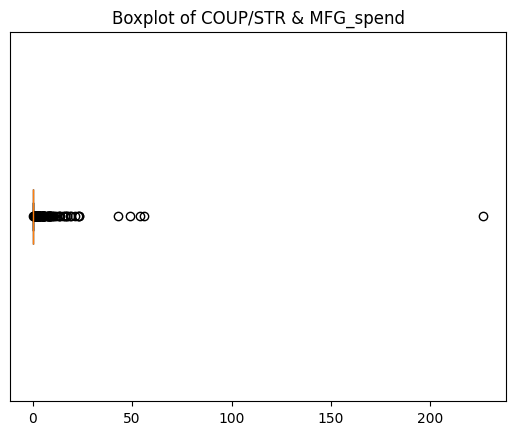

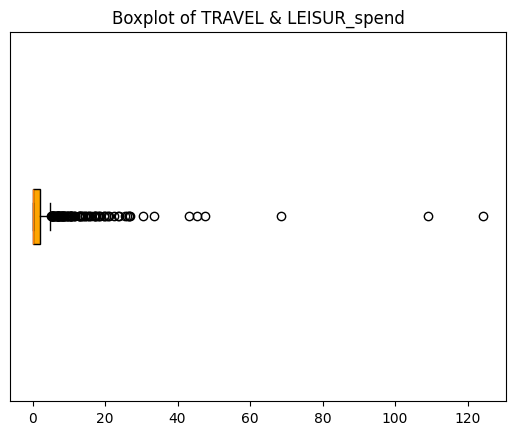

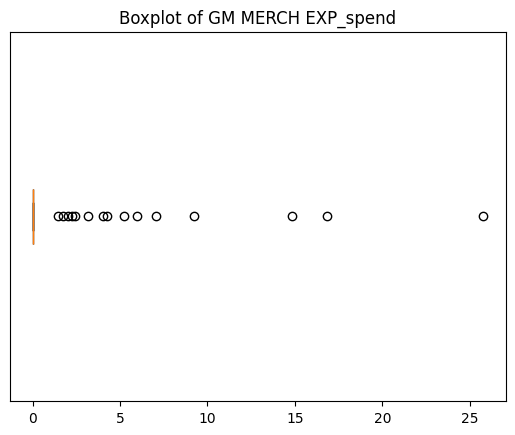

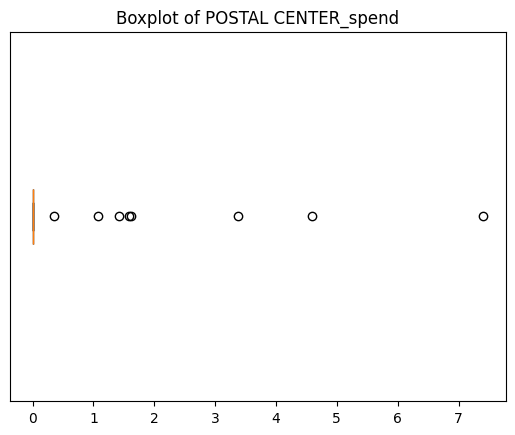

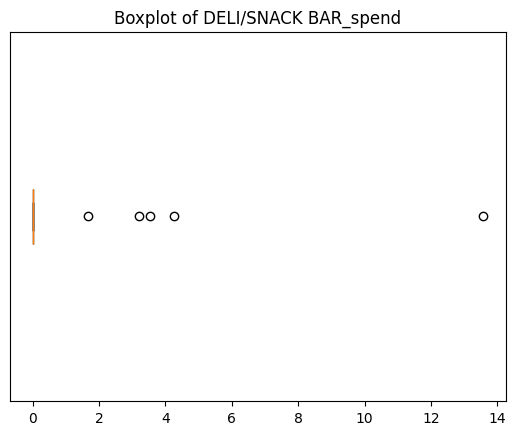

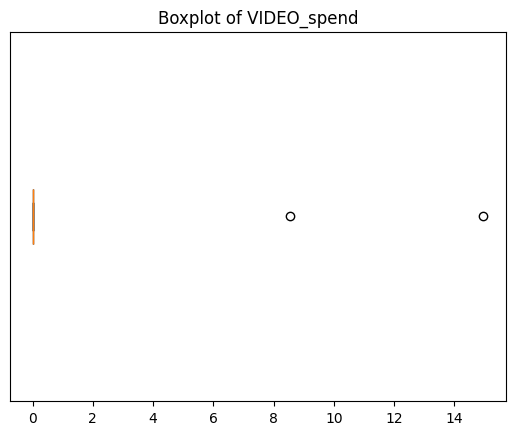

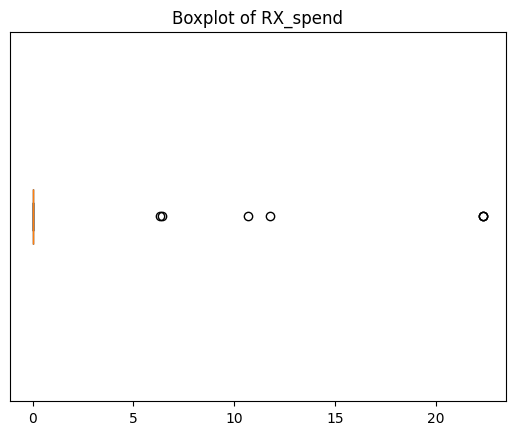

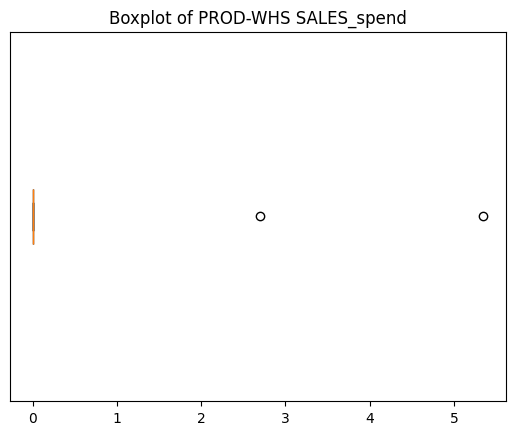

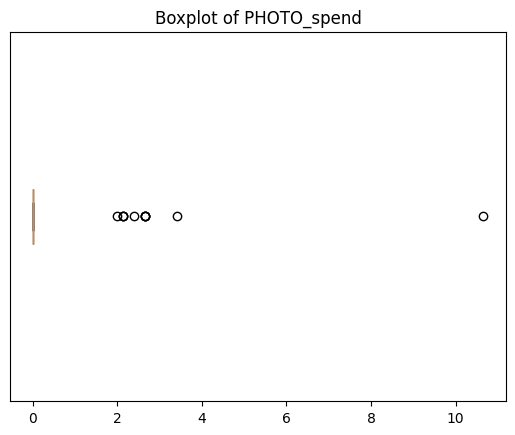

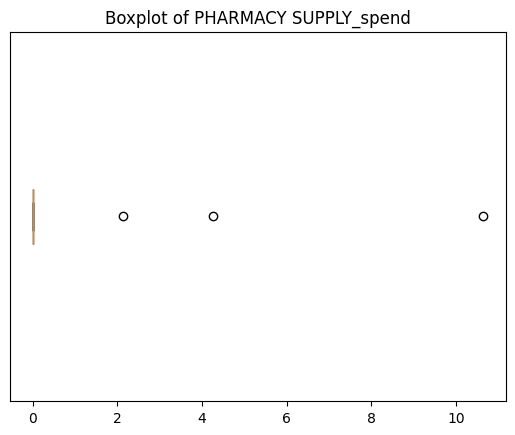

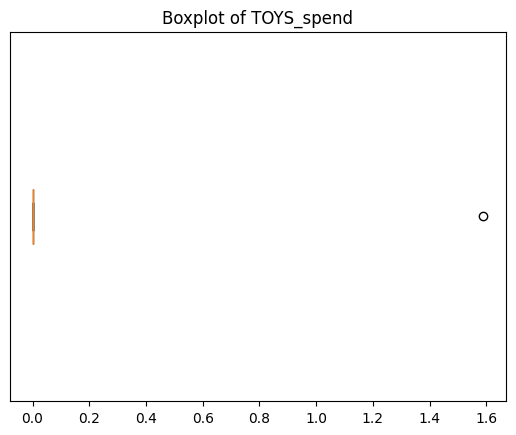

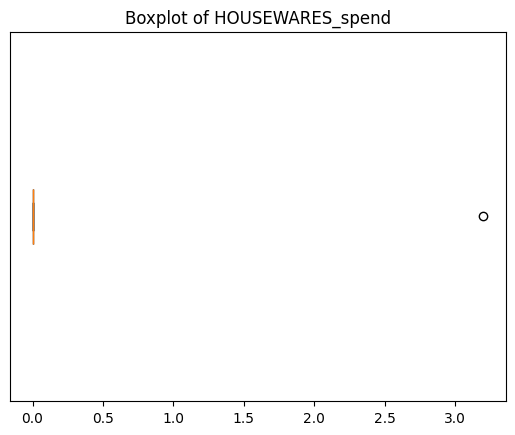

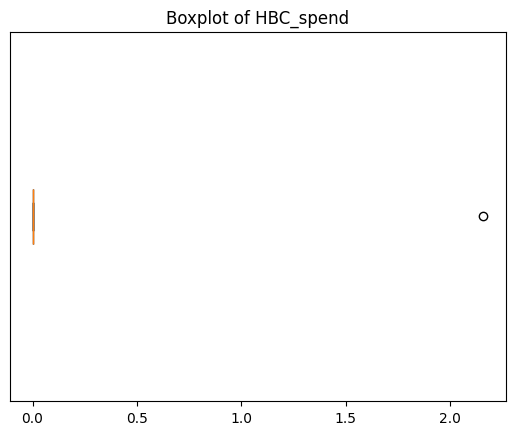

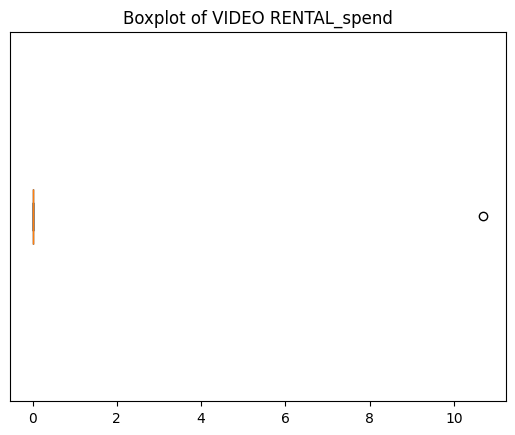

In [98]:
functions.graphs(customer_info.loc[:, customer_info.columns != 'household_key'], graph = 'boxplot')

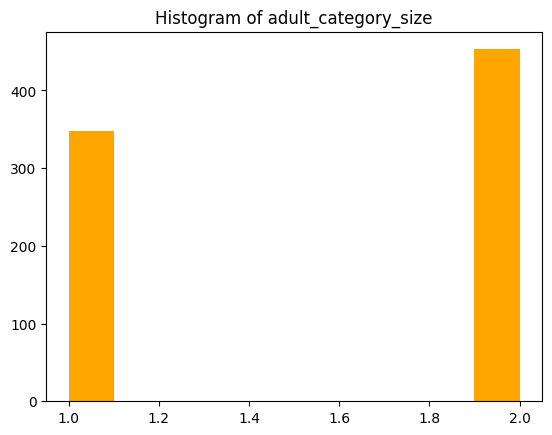

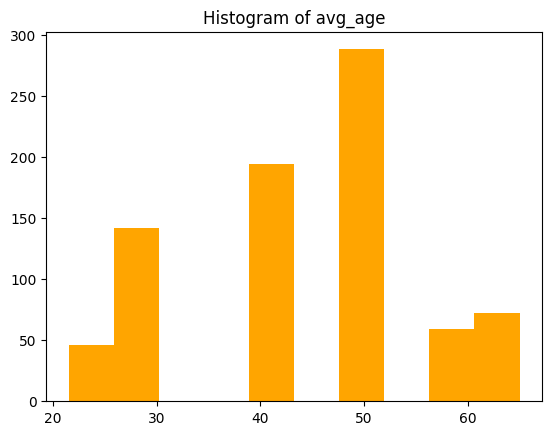

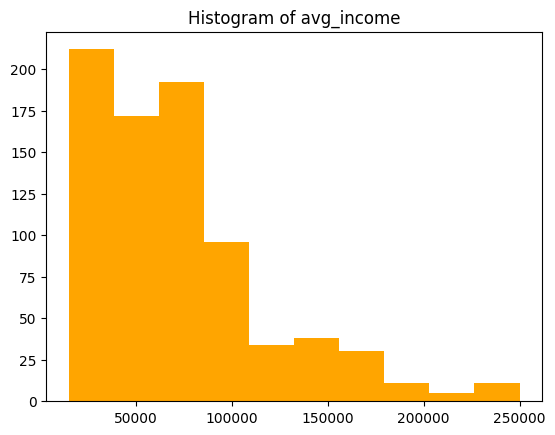

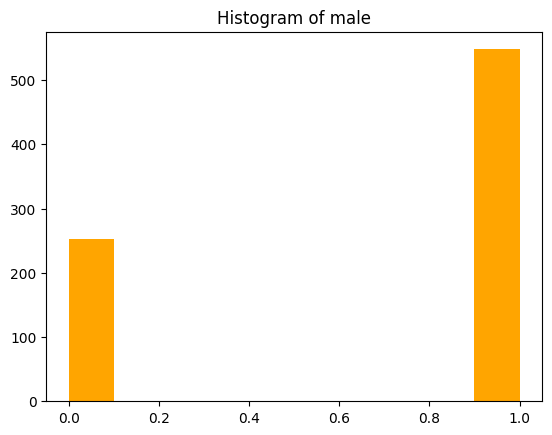

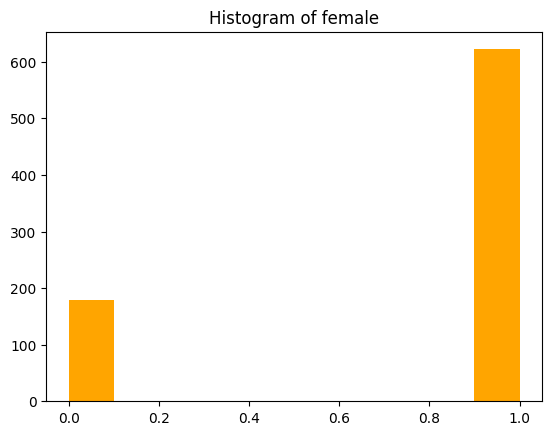

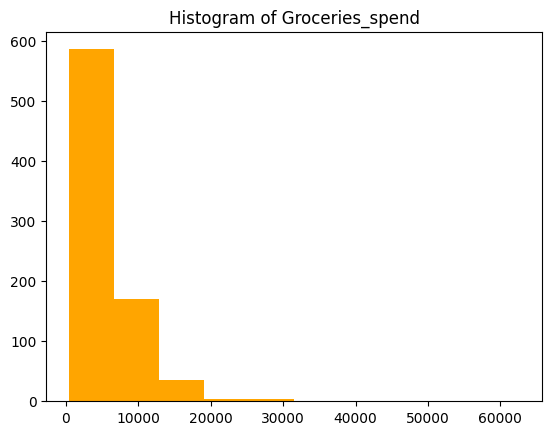

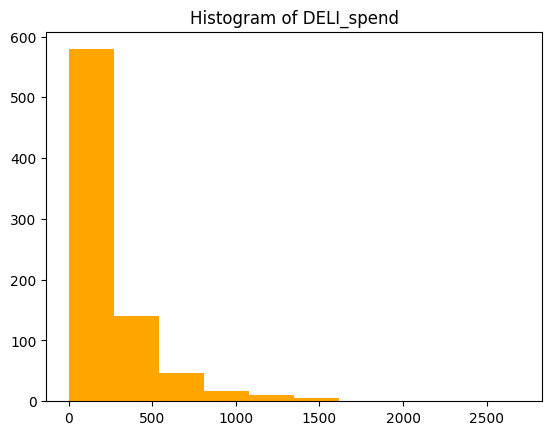

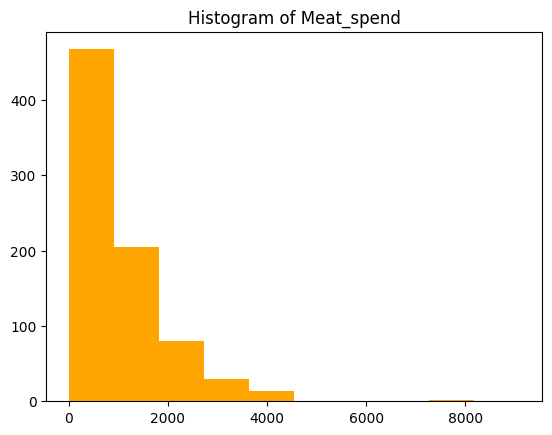

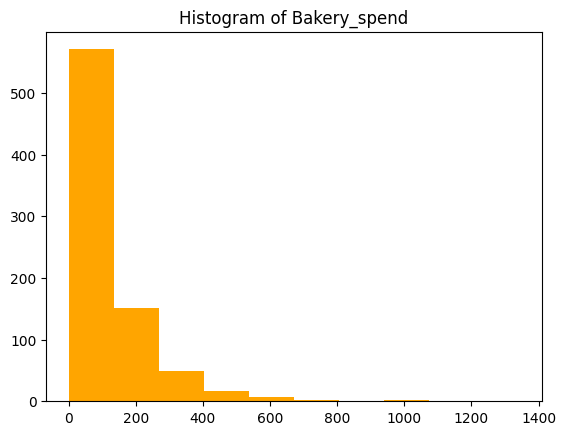

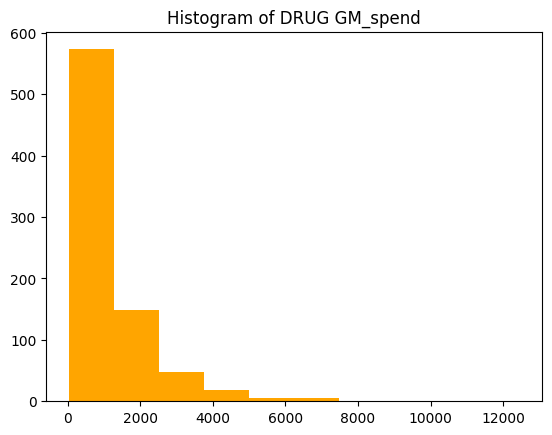

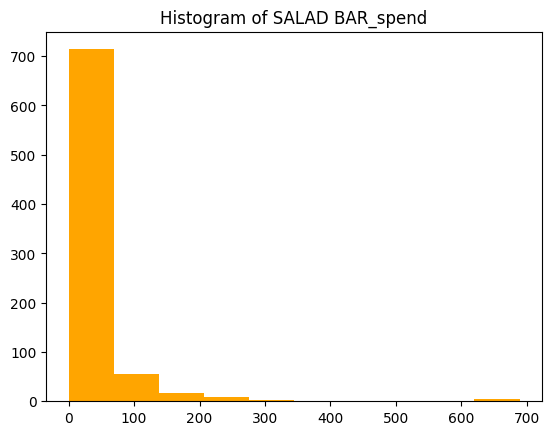

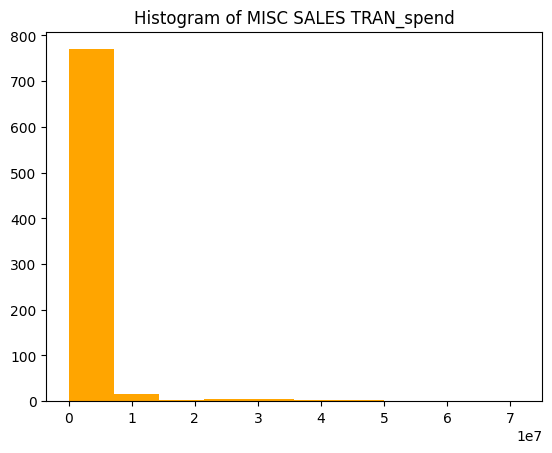

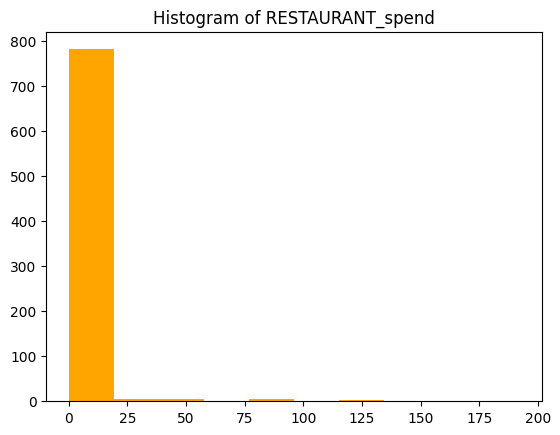

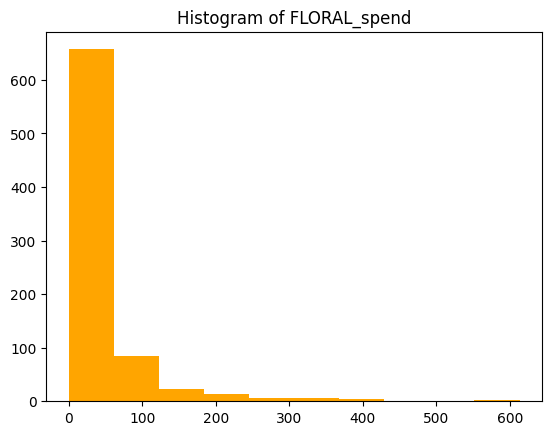

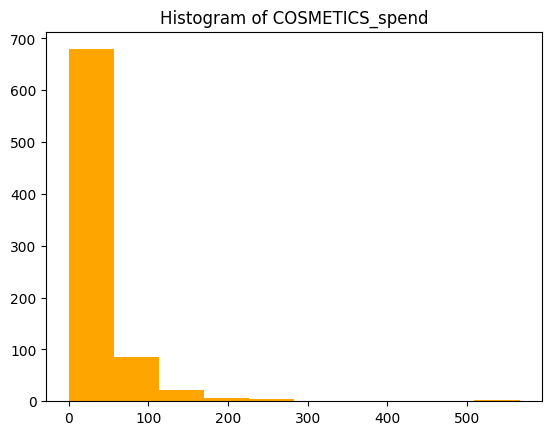

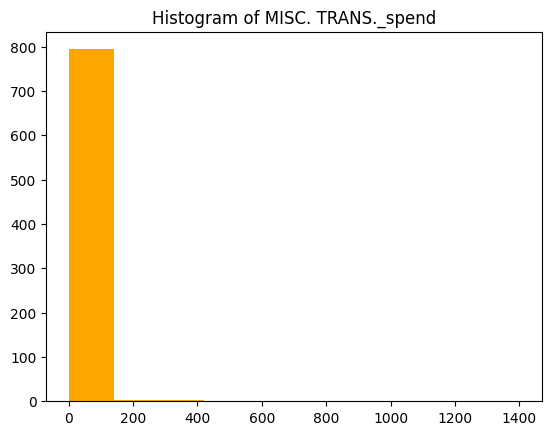

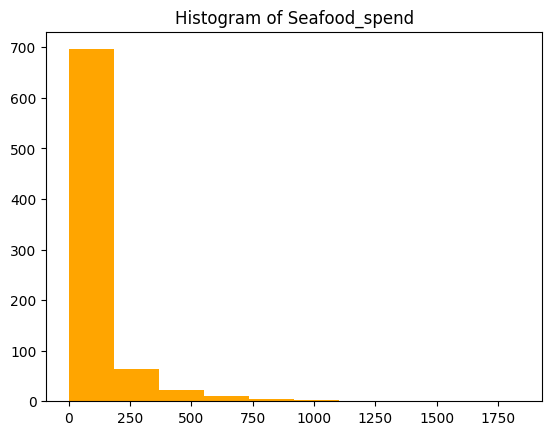

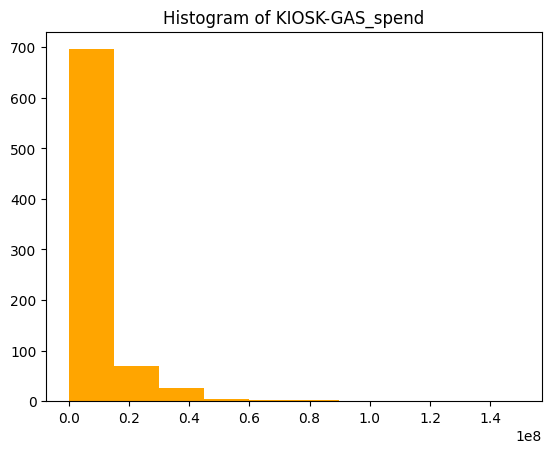

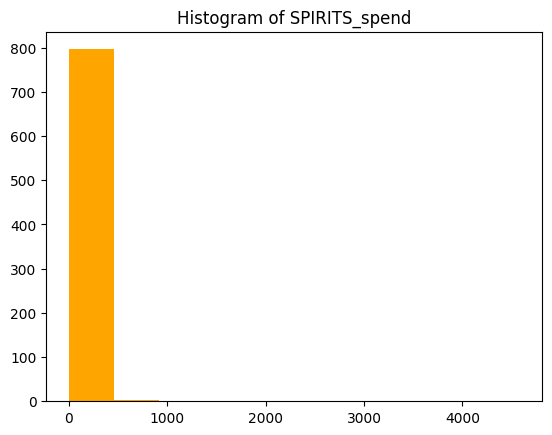

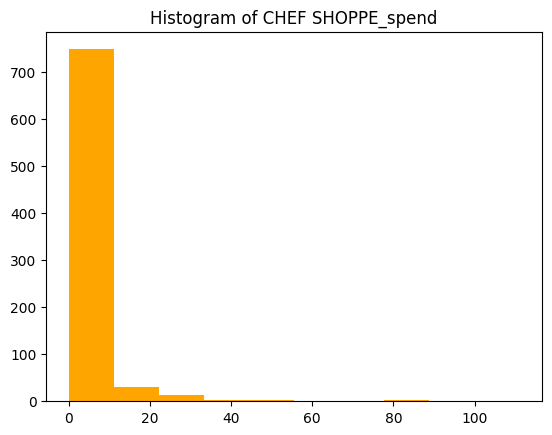

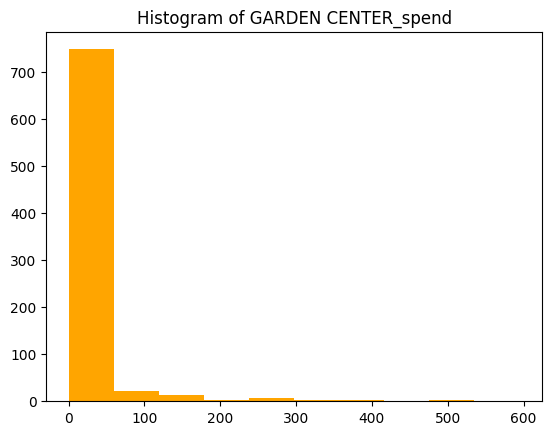

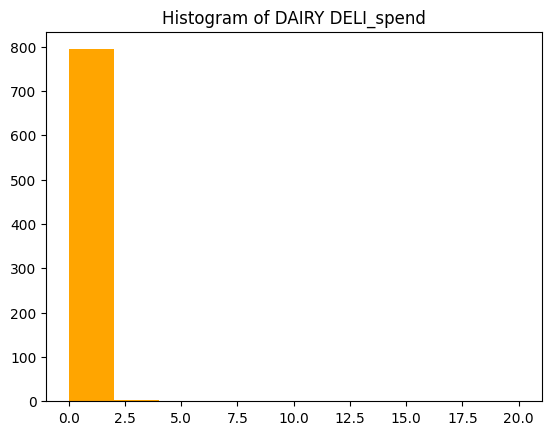

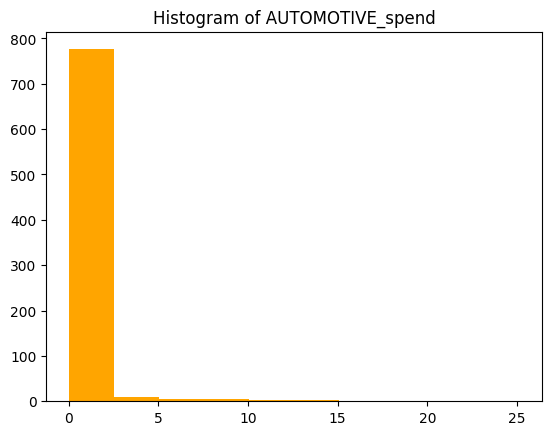

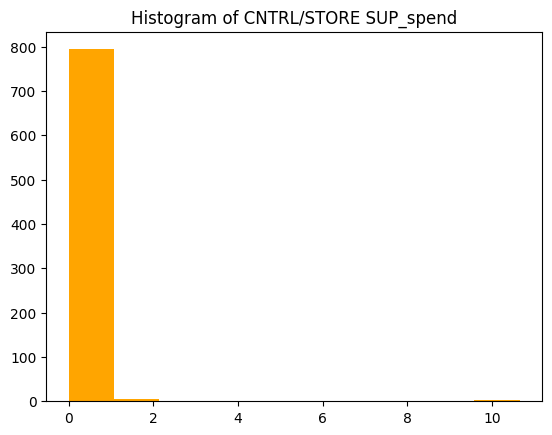

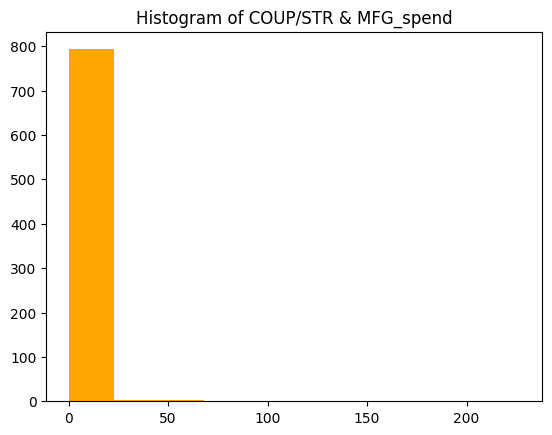

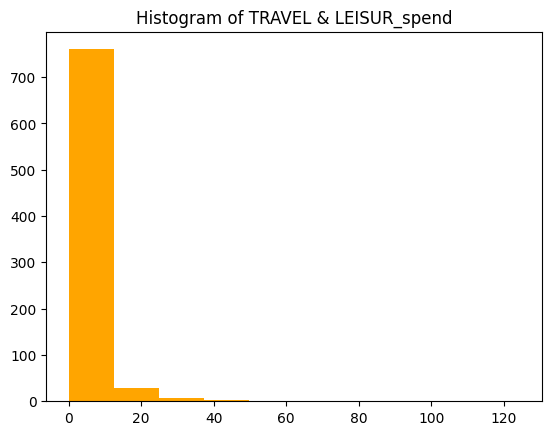

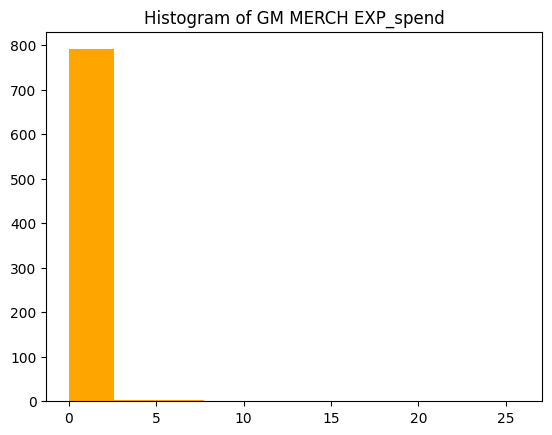

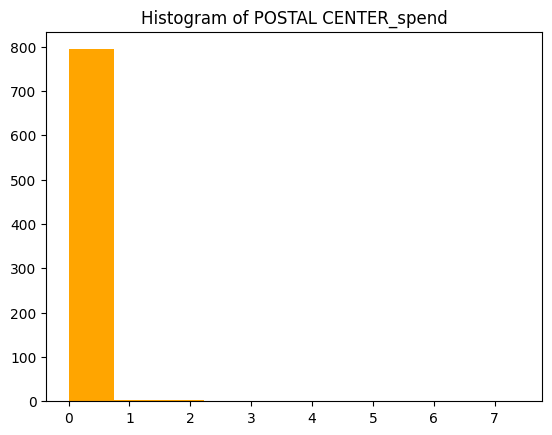

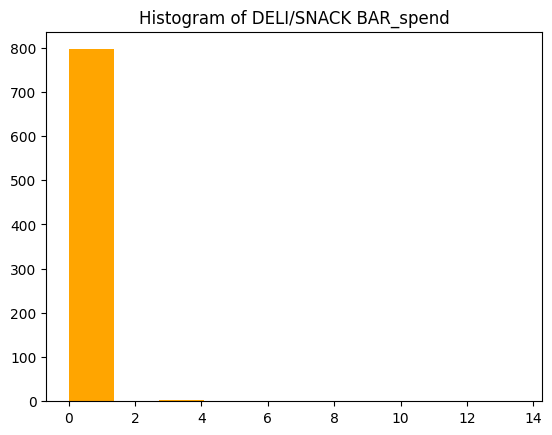

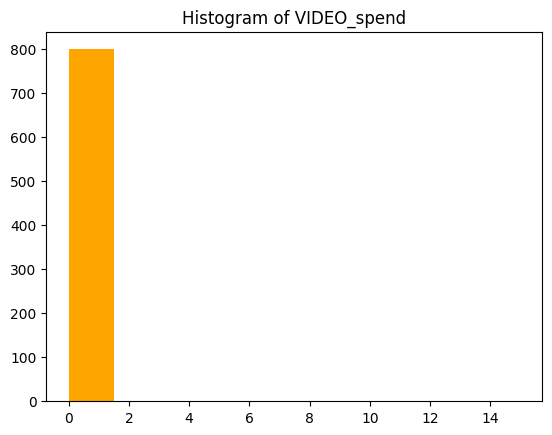

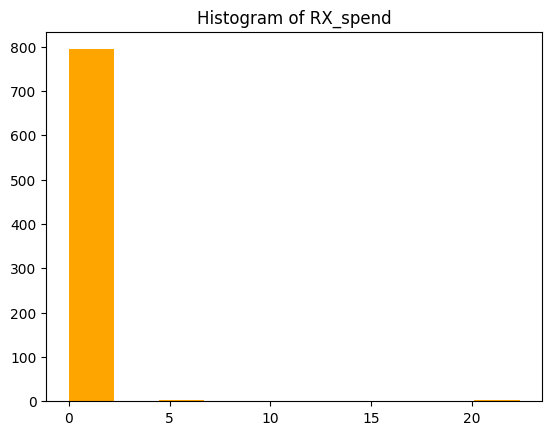

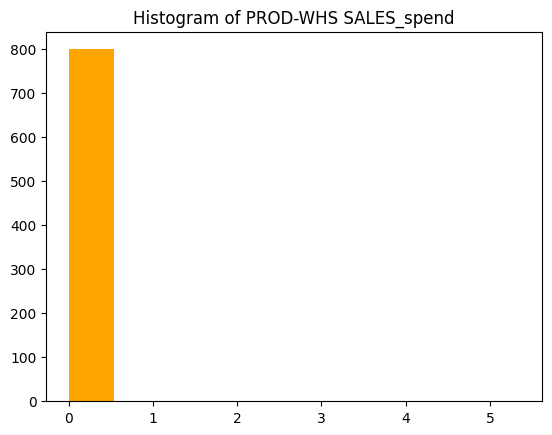

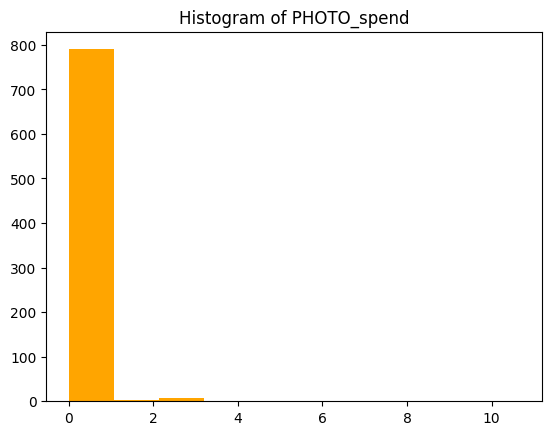

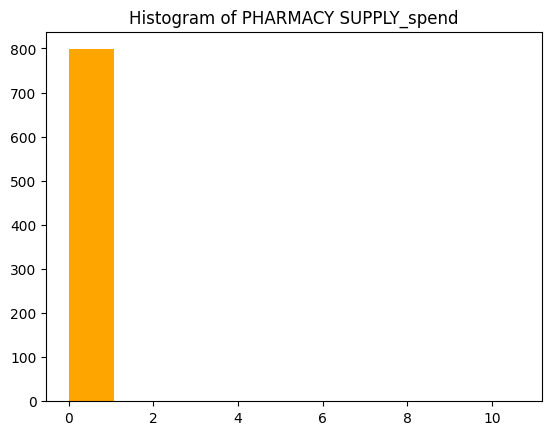

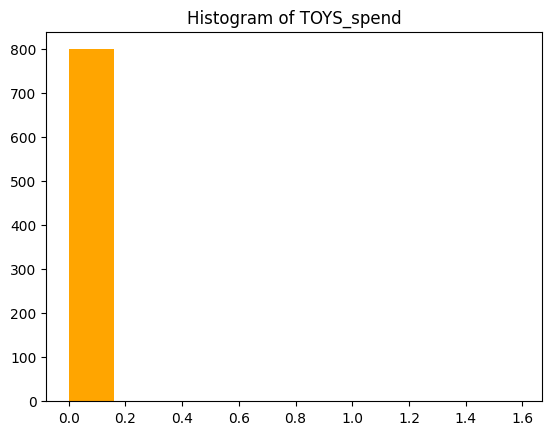

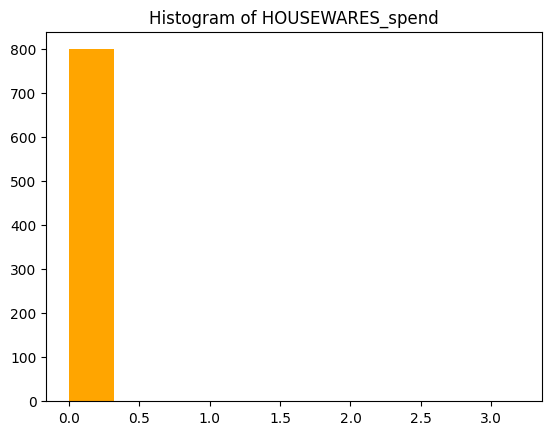

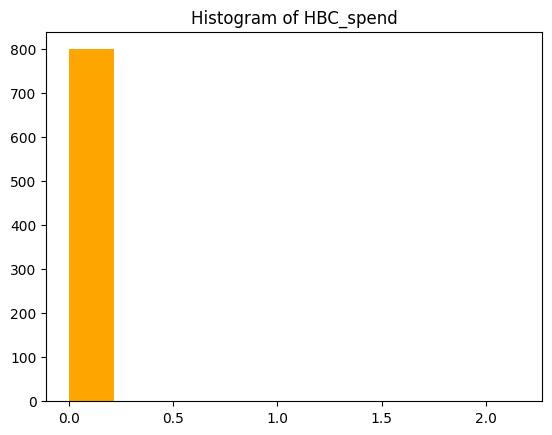

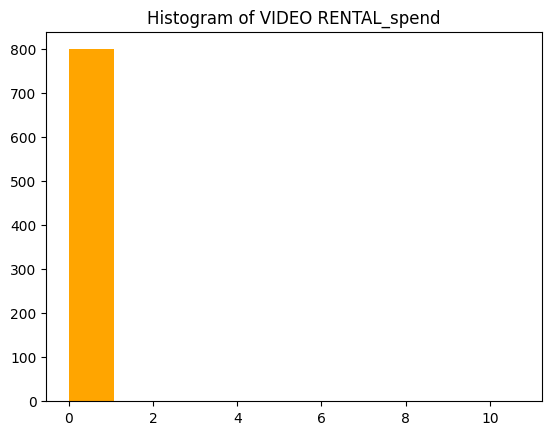

In [99]:
functions.graphs(customer_info.loc[:, customer_info.columns != 'household_key'], graph = 'histogram')

## Feature Engineering

In [100]:
replacement_mapping = {
    'A': 0,
    'B': 1,
    'U': 2
}

customer_info['marital_status_code'] = customer_info['marital_status_code'].replace(replacement_mapping)


C:\Users\aprataso\AppData\Local\Temp\ipykernel_14572\582221539.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer_info['marital_status_code'] = customer_info['marital_status_code'].replace(replacement_mapping)


In [101]:
replacement_mapping = {
    False: 0,
    True: 1
}

customer_info['has_kids'] = customer_info['has_kids'].replace(replacement_mapping)


C:\Users\aprataso\AppData\Local\Temp\ipykernel_14572\2471507936.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer_info['has_kids'] = customer_info['has_kids'].replace(replacement_mapping)


In [102]:
replacement_mapping = {
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5+': 5
}

customer_info['household_size_desc'] = customer_info['household_size_desc'].replace(replacement_mapping)


C:\Users\aprataso\AppData\Local\Temp\ipykernel_14572\1730788212.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer_info['household_size_desc'] = customer_info['household_size_desc'].replace(replacement_mapping)


In [103]:
replacement_mapping = {
    '1': 1,
    '2': 2,
    '3+': 3,
    'None/Unknown': 0 ## TEMP
}

customer_info['kid_category_desc'] = customer_info['kid_category_desc'].replace(replacement_mapping)


C:\Users\aprataso\AppData\Local\Temp\ipykernel_14572\527600509.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer_info['kid_category_desc'] = customer_info['kid_category_desc'].replace(replacement_mapping)


In [104]:
replacement_mapping = {
    'Homeowner': 0,
    'Probable Owner': 1,
    'Renter': 2,
    'Probable Renter': 3,
    'Unknown': 4,
}

customer_info['homeowner_desc'] = customer_info['homeowner_desc'].replace(replacement_mapping)


C:\Users\aprataso\AppData\Local\Temp\ipykernel_14572\397760550.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  customer_info['homeowner_desc'] = customer_info['homeowner_desc'].replace(replacement_mapping)


In [105]:
#customer_info['homeowner_desc'].unique()

In [115]:
for i in range(len(customer_info['quantity2'])):
    total_sum = 0
    for j in range(len(customer_info['quantity2'][i])):
         total_sum += customer_info['quantity2'][i][j]
    customer_info.at[i, 'sum'] = total_sum


In [ ]:
def find_non_numeric_values(lst):
    non_numeric_values = [item for item in lst if not isinstance(item, (int, float))]
    return non_numeric_values

customer_info['quantity'].apply(find_non_numeric_values)

0      [[, 1, ., 0, ,,  , 1, ., 0, ,,  , 1, ., 0, ,, ...
1      [[, 2, ., 0, ,,  , 1, ., 0, ,,  , 3, ., 0, ,, ...
2      [[, 1, ., 0, ,,  , 1, ., 0, ,,  , 1, ., 0, ,, ...
3      [[, 1, ., 0, ,,  , 1, ., 0, ,,  , 5, ., 0, ,, ...
4      [[, 1, ., 0, ,,  , 1, ., 0, ,,  , 1, ., 0, ,, ...
                             ...                        
796    [[, 1, ., 0, ,,  , 1, ., 0, ,,  , 1, ., 0, ,, ...
797    [[, 1, ., 0, ,,  , 1, ., 0, ,,  , 1, ., 0, ,, ...
798    [[, 1, ., 0, ,,  , 1, ., 0, ,,  , 1, ., 0, ,, ...
799    [[, 1, ., 0, ,,  , 1, ., 0, ,,  , 1, ., 0, ,, ...
800    [[, 1, ., 0, ,,  , 1, ., 0, ,,  , 6, ., 0, ,, ...
Name: quantity, Length: 801, dtype: object

In [117]:
customer_info.head(2)

,Unnamed: 0,marital_status_code,income_desc,homeowner_desc,hh_comp_desc,household_size_desc,kid_category_desc,household_key,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,male,female,quantity,sales_value_eu,department,department_,sales_value_eu_,quantity_,quantit_y,Groceries_spend,DELI_spend,Meat_spend,Bakery_spend,DRUG GM_spend,SALAD BAR_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,COSMETICS_spend,MISC. TRANS._spend,Seafood_spend,KIOSK-GAS_spend,SPIRITS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,DAIRY DELI_spend,AUTOMOTIVE_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,TRAVEL & LEISUR_spend,GM MERCH EXP_spend,POSTAL CENTER_spend,DELI/SNACK BAR_spend,VIDEO_spend,RX_spend,PROD-WHS SALES_spend,PHOTO_spend,PHARMACY SUPPLY_spend,TOYS_spend,HOUSEWARES_spend,HBC_spend,VIDEO RENTAL_spend,dep_quantity,quantity_serialized,quantity2,sum
0,0,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1,married,senior,2.000000,NaN,65.000000,42000,1,1,"[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, ...","[4.27, 3.2, 1.17, 3.97, 2.99, 7.69, 2.68, 1.59...","['Groceries', 'Groceries', 'Groceries', 'DELI'...","['Groceries', 'Groceries', 'Groceries', 'DELI'...","[4.27, 3.2, 1.17, 3.97, 2.99, 7.69, 2.68, 1.59...","[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, ...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, ...",4158.560000,226.990000,418.070000,127.380000,712.800000,67.590000,21.400000,4.470000,8.550000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"{""ELECT &PLUMBING"": 0, ""COUP/STR & MFG"": 0, ""M...","[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, ...",1997.000000
1,1,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7,married,middle-aged,2.000000,NaN,49.500000,62000,1,1,"[2, 1, 3, 4, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, ...","[3.62, 1.17, 2.82, 4.28, 4.18, 4.13, 1.46, 2.4...","['Groceries', 'Groceries', 'Groceries', 'Groce...","['Groceries', 'Groceries', 'Groceries', 'Groce...","[3.62, 1.17, 2.82, 4.28, 4.18, 4.13, 1.46, 2.4...","[2, 1, 3, 4, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, ...","[2.0, 1.0, 3.0, 4.0, 1.0, 1.0, 2.0, 1.0, 1.0, ...",2957.050000,171.570000,314.790000,27.620000,845.930000,0.000000,0.000000,0.000000,5.340000,101.340000,1.870000,7.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"{""ELECT &PLUMBING"": 0, ""COUP/STR & MFG"": 0, ""M...","[2, 1, 3, 4, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, ...","[2, 1, 3, 4, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, ...",1554.000000


## Correlation Analysis

In [ ]:
# creating a new variable with only numeric data
info_numeric = customer_info.loc[:, ~customer_info.columns.isin(
    ['income_desc', 'homeowner_desc', 'hh_comp_desc', 'marital_status', 'age_group', 'quantity', 'sales_value_eu', 'department', 'dep_quantity'])]

In [ ]:
cor_spearman = info_numeric.corr(method='spearman')

mask = np.triu(np.ones_like(cor_spearman, dtype=bool))

# Apply the mask to the correlation matrix
cor_spearman_masked = cor_spearman.copy()
cor_spearman_masked[mask] = np.nan

# Plotly heatmap
fig = go.Figure(data=go.Heatmap(
    z=cor_spearman_masked,
    x=cor_spearman.columns,
    y=cor_spearman.columns,
    colorscale='Blues',
    colorbar=dict(title='Spearman Correlation'),
    zmin=-1, zmax=1,
    hoverongaps=False
))

fig.update_layout(
    title='Spearman Correlation Heatmap (Below Diagonal)',
    xaxis_title='Variables',
    yaxis_title='Variables',
    xaxis=dict(tickangle=90,  tickfont=dict(size=10)),
    yaxis=dict(tickangle=0,  tickfont=dict(size=10)),
    width=1300,
    height=1300,
)

# Show the interactive plot
fig.show()


## Export

In [ ]:
#customer_info = customer_info.to_csv(
#    'C:/Users/aprataso/Downloads/final_data/treated/customer_info_EDA.csv',
#    index=False)

## Tests

In [ ]:
customer_info[customer_info['male'] == 1]['male'].count()

np.int64(548)